# Warehouse Optimization (Time Series Prediction)

## Initilization

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
data = pd.read_csv('ML_data_LSTM.csv')
data.reset_index(drop=True, inplace=True)
data = data.drop(['Manufacturer No', 'Product Name', 'List No',
                 'UPC Code', 'SaleRate', 'SaleRateNew'], axis=1)
data.head(10)

,Item No,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,Profit,STOCK TYPE,Date,In Stock,weight(lb),Initial Stock
0,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,13-Feb-19,Y,0.25,51
1,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,14-Feb-19,Y,0.25,51
2,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,15-Feb-19,Y,0.25,51
3,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,16-Feb-19,Y,0.25,51
4,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,17-Feb-19,Y,0.25,51
5,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,18-Feb-19,Y,0.25,51
6,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,19-Feb-19,Y,0.25,51
7,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,20-Feb-19,Y,0.25,51
8,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,21-Feb-19,Y,0.25,51
9,1000M500D1,Crucial,SATA3,Component,Solid State Drive,SATA3,135.3,101.475,0,2.5,31.325,Recurring,22-Feb-19,Y,0.25,51


In [3]:
print(data.shape)
data = data[data.Inventory != '#REF!']
print(data.shape)

(378000, 16)
(378000, 16)


In [4]:
data.columns

Index(['Item No', 'Manufacturer', 'Category', 'Category Path 1',
       'Category Path 2', 'Category Path 3', 'Price(USD)', 'Cost price',
       'Inventory', 'Shipping', 'Profit', 'STOCK TYPE', 'Date', 'In Stock',
       'weight(lb)', 'Initial Stock'],
      dtype='object')

In [5]:
data[pd.to_numeric(data.Inventory, errors='coerce').isnull()]

,Item No,Manufacturer,Category,Category Path 1,Category Path 2,Category Path 3,Price(USD),Cost price,Inventory,Shipping,Profit,STOCK TYPE,Date,In Stock,weight(lb),Initial Stock


In [6]:
print(data.dtypes)
data.Inventory = data.Inventory.astype(str).astype(int)
print(data.dtypes)

Item No             object
Manufacturer        object
Category            object
Category Path 1     object
Category Path 2     object
Category Path 3     object
Price(USD)         float64
Cost price         float64
Inventory            int64
Shipping           float64
Profit             float64
STOCK TYPE          object
Date                object
In Stock            object
weight(lb)         float64
Initial Stock        int64
dtype: object
Item No             object
Manufacturer        object
Category            object
Category Path 1     object
Category Path 2     object
Category Path 3     object
Price(USD)         float64
Cost price         float64
Inventory            int32
Shipping           float64
Profit             float64
STOCK TYPE          object
Date                object
In Stock            object
weight(lb)         float64
Initial Stock        int64
dtype: object


In [7]:
data = data.fillna(data.median()) 

In [8]:
from scipy import stats
stat, p = stats.normaltest(data.Inventory)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=544710.273, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 100.53200586916208
Skewness of normal distribution: 8.829737356772588


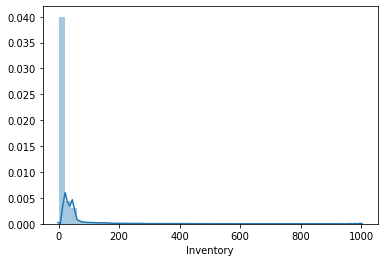

In [9]:
import seaborn as sns
%matplotlib inline
sns.distplot(data.Inventory);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Inventory)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Inventory)))

In [10]:
stock_data = data[data.Date == '01-Jan-19']
print(stock_data[stock_data.Inventory > 0].shape)
print(stock_data[stock_data.Inventory > 10].shape)
print(stock_data[stock_data.Inventory > 100].shape)
print(stock_data[stock_data.Inventory > 200].shape)
print(stock_data[stock_data.Inventory > 300].shape)

(4200, 16)
(2670, 16)
(333, 16)
(152, 16)
(79, 16)


In [11]:
nominal_data = data.select_dtypes(include=[object])
ordinal_data = data.drop(list(nominal_data.columns), axis=1)
nominal_data = nominal_data.replace(np.nan, 'Default', regex=True)

In [ ]:
from sklearn import preprocessing
nominal_data_2 = nominal_data
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(nominal_data_2)
# 3. Transform
onehotlabels = enc.transform(nominal_data_2).toarray()
print(onehotlabels.shape)
(4200, 30, 553)

In [ ]:
encoded_data = pd.concat([ordinal_data, pd.DataFrame(onehotlabels)], axis=1)

In [ ]:
new_data = encoded_data.groupby('')



In [72]:
new_data.head(5)
new_data = new_data.aggregate(lambda x: list(x))
new_data.head(1).Date

Manufacturer  Category  Category Path 1  Category Path 2  Category Path 3
AIC           1U        Component        Server           Server Barebone    [26-Mar-19, 27-Mar-19, 28-Mar-19, 29-Mar-19, 3...
Name: Date, dtype: object

Index(['Price(USD)', 'Cost price', 'Inventory', 'Shipping', 'Profit',
       'STOCK TYPE', 'Date', 'In Stock', 'weight(lb)', 'Initial Stock'],
      dtype='object')

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaler = scaler.fit_transform(encoded_data)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [40]:
encoded_scaler_data = pd.DataFrame(data_scaler, index=encoded_data.index, columns=encoded_data.columns)
encoded_scaler_data.head(10)

,Price(USD),Cost price,Inventory,Shipping,Profit,weight(lb),Initial Stock,0,1,2,...,543,544,545,546,547,548,549,550,551,552
0,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
1,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
2,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
3,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
4,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
5,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
6,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
7,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
8,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137
9,-0.244112,-0.244428,-0.287486,-0.083928,-0.239493,-0.452334,0.069655,-0.053529,-0.067412,-0.11087,...,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.106,-0.511137,0.511137


In [41]:
X = encoded_scaler_data.drop('Inventory', axis=1)
Y = encoded_scaler_data['Inventory']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [45]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [51]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[0], X_train.shape[1])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(X_train, Y_train, epochs=50, batch_size=72, validation_data=(X_test, Y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

ValueError: Error when checking input: expected lstm_2_input to have 3 dimensions, but got array with shape (302400, 559)

In [16]:
import sys
!conda install --yes --prefix {sys.prefix} keras

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - keras


The following NEW packages will be INSTALLED:

  _tflow_select      pkgs/main/win-64::_tflow_select-2.3.0-mkl
  absl-py            pkgs/main/win-64::absl-py-0.8.1-py37_0
  astor              pkgs/main/win-64::astor-0.8.0-py37_0
  gast               pkgs/main/win-64::gast-0.2.2-py37_0
  google-pasta       pkgs/main/noarch::google-pasta-0.1.8-py_0
  grpcio             pkgs/main/win-64::grpcio-1.16.1-py37h351948d_1
  keras              pkgs/main/win-64::keras-2.2.4-0
  keras-applications pkgs/main/noarch::keras-applications-1.0.8-py_0
  keras-base         pkgs/main/win-64::keras-base-2.2.4-py37_0
  keras-preprocessi~ pkgs/ma


EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [ ]:
# limit to categorical data using df.select_dtypes()
#nominal_data = data.drop(['Price(USD)', 'Cost price', 'Inventory', 'Shipping', 'Profit', 'weight(lb)', 'SaleRateNew'], axis=1)
#ordinal_data = data.drop(nominal_data.columns)
nominal_data = data.select_dtypes(include=[object])
ordinal_data = data.drop(list(nominal_data.columns), axis=1)
nominal_data = nominal_data.replace(np.nan, 'Default', regex=True)

## One-Hot Encoding

In [ ]:
from sklearn import preprocessing
nominal_data_2 = nominal_data
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(nominal_data_2)
# 3. Transform
onehotlabels = enc.transform(nominal_data_2).toarray()
print(onehotlabels.shape)

In [ ]:
encoded_data = pd.concat([ordinal_data, pd.DataFrame(onehotlabels)], axis=1)

## Data Split

In [ ]:
X = encoded_data.drop('SaleRateNew', axis=1)
Y = encoded_data['SaleRateNew']

## Tunning

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
def test(models, X, Y, iterations = 10):
    results = {}
    for i in models:
        print("\nRunning ", i)
        r2_train = []
        r2_test = []
        for j in range(iterations):
            print(j, end='')
            X_train, X_test, y_train, y_test = train_test_split(X, 
                                                                Y, 
                                                                test_size= 0.2)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                         y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                          y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [ ]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),
         'Ada': AdaBoostRegressor(),
         'GBM': GradientBoostingRegressor()}

In [ ]:
%time test(models, X, Y)

In [ ]:
ada_param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

gbm_param = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['ls', 'lad', 'huber', 'quantile']
 }

models2 = {'Ada': GridSearchCV(AdaBoostRegressor(), 
                               param_grid=ada_param).fit(X, Y).best_estimator_,
          'GBM': GridSearchCV(GradientBoostingRegressor(), 
                               param_grid=ada_param).fit(X, Y).best_estimator_}
%time test(models2, X, Y)

In [ ]:
models2['Ada']

In [ ]:
models2['GBM']